Hola Clara!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

# Introducción 

El presente trabajo se refiere a la importancia de realizar pruebas antes de realizar un cambio. Las pruebas A/B sirven para encontrar datos estadísticos acerca de tu audiencia y obtener conclusiones a diferentes hipótesis. Además, ayudan a refinar y acelerar tus procesos de conversión a fin de lograr que más visitantes se conviertan en leads y clientes.

La caracteristica principal de las pruebas A/B implican la creación de 2 versiones de un activo digital para ver a cuál responden mejor los usuarios. Los ejemplos de activos incluyen páginas de destino, anuncios gráficos, correos electrónicos de marketing y publicaciones en redes sociales. En una prueba A/B, la mitad de tu público recibe automáticamente la "versión A" y la otra mitad recibe la "versión B". El rendimiento de cada versión se basa en el objetivo de la tasa de conversión, como el porcentaje de personas que hacen clic en un enlace, completan un formulario o hacen una compra.

Las pruebas A/B, junto con otras estrategias de optimización de conversión, te permiten probar cosas para que puedas mejorar tus contenidos, proporcionar las mejores experiencias a los clientes y llegar a tus objetivos de conversión más rápido.

Para analizar como funcionan este tipo de pruebas en el presente trabajo se desarrolla un ejemplo de como llevar a cabo estas pruebas en un entorno de programacion con python. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Excelente trabajo incluyendo la tabla de contenidos y la redacción de la introducción! Procura mantener esta práctica en tus próximos proyectos ya que esto ayuda a entender el objetivo del proyecto
</div>

## 1. Preprocesamiento de datos 

In [1]:
# Importación de librerias
import pandas as pd
from pandas import pivot_table
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as st
from datetime import datetime
import datetime as dt
import scipy.stats as stats

In [2]:
# Lectura de los dataframes
hypotheses_us = pd.read_csv(
    "/datasets/hypotheses_us.csv", sep=";")
orders_us = pd.read_csv(
    "/datasets/orders_us.csv")
visits_us = pd.read_csv(
    "/datasets/visits_us.csv")
"""# Lectura de los dataframes
hypotheses_us = pd.read_csv(
    "c:/Users/cary_/OneDrive/Escritorio/Data analyst/Sprint 9/hypotheses_us.csv", sep=";")
orders_us = pd.read_csv(
    "c:/Users/cary_/OneDrive/Escritorio/Data analyst/Sprint 9/orders_us.csv")
visits_us = pd.read_csv(
    "c:/Users/cary_/OneDrive/Escritorio/Data analyst/Sprint 9/visits_us.csv")"""

'# Lectura de los dataframes\nhypotheses_us = pd.read_csv(\n    "c:/Users/cary_/OneDrive/Escritorio/Data analyst/Sprint 9/hypotheses_us.csv", sep=";")\norders_us = pd.read_csv(\n    "c:/Users/cary_/OneDrive/Escritorio/Data analyst/Sprint 9/orders_us.csv")\nvisits_us = pd.read_csv(\n    "c:/Users/cary_/OneDrive/Escritorio/Data analyst/Sprint 9/visits_us.csv")'

In [3]:
# Se crea una funcion para bajar los tipos de datos
def downcast_dtypes(df):
    float_cols = df.select_dtypes("float").columns
    int_cols = df.select_dtypes("integer").columns

    df[float_cols] = df[float_cols].apply(pd.to_numeric, downcast="float")
    df[int_cols] = df[int_cols].apply(pd.to_numeric, downcast="integer")

    return df

In [4]:
# Mostrar información del dataframe hypotheses_us
hypotheses_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
# Se usa la funcion downcast_dtypes para bajar los tipos de datos del dataframe hypotheses_us
downcast_dtypes(hypotheses_us)

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [6]:
# Se convierten todas las columnas a minusculas y se eliminan espacios de la columa hypothesis
hypotheses_us.columns = hypotheses_us.columns.str.lower()
hypotheses_us['hypothesis'] = hypotheses_us['hypothesis'].str.strip()


In [7]:
# Impresión de muestra dataframe hypotheses_us 
hypotheses_us.head()

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


In [8]:
# Mostrar información del dataframe orders_us
orders_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [9]:
# Se usa la funcion downcast_dtypes para bajar los tipos de datos del dataframe orders_us
downcast_dtypes(orders_us)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.400000,B
1,2804400009,3642806036,2019-08-15,15.200000,B
2,2961555356,4069496402,2019-08-15,10.200000,A
3,3797467345,1196621759,2019-08-15,155.100006,B
4,2282983706,2322279887,2019-08-15,40.500000,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.800003,B
1193,2203539145,370388673,2019-08-14,50.099998,A
1194,1807773912,573423106,2019-08-14,165.300003,A
1195,1947021204,1614305549,2019-08-14,5.500000,A


In [10]:
# Se convierten todas las columnas a minusculas
orders_us.columns = orders_us.columns.str.lower()

# Se renombran algunas de las columnas 
columns_new = {'transactionid':'transaction_id', 'visitorid': 'visitor_id'}
orders_us = orders_us.rename(columns= columns_new)

# Se convierte a tipo fecha la columna date
orders_us['date'] = pd.to_datetime(orders_us['date'], format="%Y-%m-%d")

In [11]:
# Impresión de muestra dataframe orders_us 
orders_us.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.400000,B
1,2804400009,3642806036,2019-08-15,15.200000,B
2,2961555356,4069496402,2019-08-15,10.200000,A
3,3797467345,1196621759,2019-08-15,155.100006,B
4,2282983706,2322279887,2019-08-15,40.500000,B


In [12]:
# Mostrar información del dataframe visits_us
visits_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [13]:
# Se usa la funcion downcast_dtypes para bajar los tipos de datos del dataframe visits_us
downcast_dtypes(visits_us)

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [14]:
# Se convierte a tipo fecha la columna date
visits_us['date'] = pd.to_datetime(visits_us['date'], format="%Y-%m-%d")

In [15]:
visits_us.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [16]:
# Se revisa si existe algún valor duplicado
print('Duplicados totales para hypotheses_us: ', hypotheses_us.duplicated().sum())
print('Duplicados totales para orders_us: ', orders_us.duplicated().sum())
print('Duplicados totales para visits_us: ', visits_us.duplicated().sum())

Duplicados totales para hypotheses_us:  0
Duplicados totales para orders_us:  0
Duplicados totales para visits_us:  0


In [17]:
# Se revisa si existe algún valor nulo
print('Duplicados totales para hypotheses_us: ', hypotheses_us.isna().sum().sum())
print('Duplicados totales para orders_us: ', orders_us.isna().sum().sum())
print('Duplicados totales para visits_us: ', visits_us.isna().sum().sum())

Duplicados totales para hypotheses_us:  0
Duplicados totales para orders_us:  0
Duplicados totales para visits_us:  0


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con la revisión inicial de tus datos y la transformación de los mismos, siempre es importante entender con lo que trabajarás!
</div>

## 2. Priorizar hipótesis

### 2.1 Aplicar el framework ICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.

In [18]:
# Se hace el calculo del framework ICE y se ordena de forma descendente
hypotheses_us['ICE'] = (hypotheses_us['impact'] * hypotheses_us['confidence']) / hypotheses_us['effort']
print(hypotheses_us[['hypothesis', 'ICE']].sort_values('ICE', ascending=False))

                                          hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000


### 2.2 Aplicar el framework RICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.

In [19]:
hypotheses_us['RICE'] = (hypotheses_us['reach'] * hypotheses_us['impact'] * hypotheses_us['confidence']) / hypotheses_us['effort']
print(hypotheses_us[['hypothesis', 'RICE']].sort_values('RICE', ascending=False))

                                          hypothesis       RICE
6  Show banners with current offers and sales on ...  40.000000
8  Launch a promotion that gives users discounts ...  16.200000
7  Add a subscription form to all the main pages....   9.600000
3  Change the category structure. This will incre...   9.000000
1  Launch your own delivery service. This will sh...   4.000000
5  Add a customer review page. This will increase...   4.000000
4  Change the background color on the main page. ...   3.000000
0  Add two new channels for attracting traffic. T...  -2.666667
2  Add product recommendation blocks to the store... -29.333333


### 2.3 Mostrar cómo cambia la priorización de hipótesis cuando utilizas RICE en lugar de ICE. Proporcionar una explicación de los cambios.

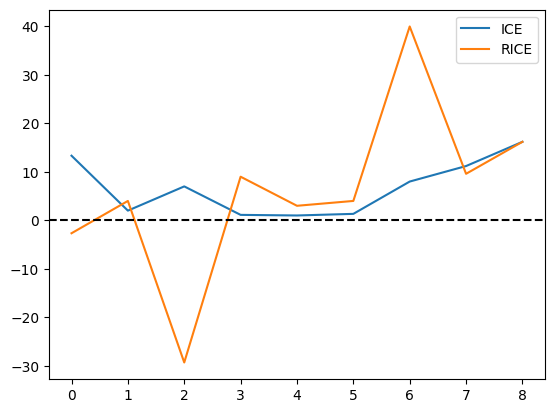

In [20]:
# Se crea un grafico de linea para cada columna de ICE y RICE
hypotheses_us['ICE'].plot(kind='line')
hypotheses_us['RICE'].plot(kind='line')
plt.legend()

# agregar el eje X
plt.axhline(y=0, color='black', linestyle='--')

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo con el cálculo para la priorización con los diferentes frameworks! El presentar en gráfica este tipo de comparaciones es muy bueno para que sea mucho más entendible la comparación
</div>

## 3. Análisis de test A/B

### 3.1 Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas.

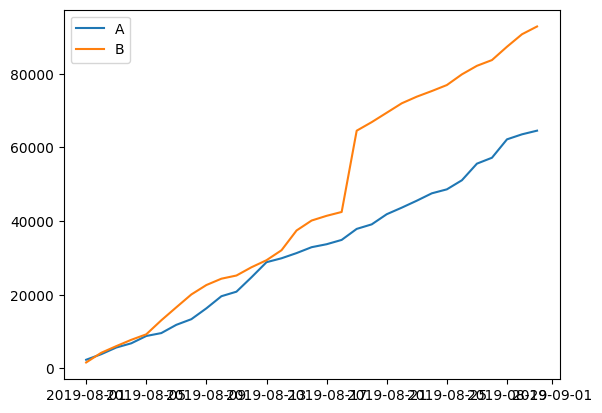

In [21]:
# Se crea una matriz con los valores unicos de parejas de fechas y grupos, se borran los duplicados
dates_groups = orders_us[['date', 'group']].drop_duplicates()

# Se calculan los resultados diarios acumulados agregados de los pedidos
orders_aggregated = dates_groups.apply(lambda x:orders_us[np.logical_and(orders_us['date'] <= x['date'], orders_us['group'] == x['group'])]
                                       .agg({
                                           'date': 'max',
                                           'group': 'max',
                                           'transaction_id': pd.Series.nunique,
                                           'visitor_id': pd.Series.nunique,
                                           'revenue': 'sum'
                                       }), axis=1, ).sort_values(by=['date', 'group'])

# Se calculan los resultados diarios acumulados agregados de las visitas
visits_aggregated = dates_groups.apply(lambda x:visits_us[np.logical_and(visits_us['date'] <= x['date'], visits_us['group'] == x['group'])]
                                       .agg({
                                           'date': 'max',
                                           'group': 'max',
                                           'visits': 'sum'
                                       }), axis=1, ).sort_values(by=['date', 'group'])

# Se fusionan las tablas creadas de ordenes y vistantes
cum_data = orders_aggregated.merge(visits_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cum_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# Dataframes con los ingresos acumulados de cada uno de los grupos
cum_rev_a= cum_data[cum_data['group'] == 'A'][['date', 'revenue', 'orders']]
cum_rev_b= cum_data[cum_data['group'] == 'B'][['date', 'revenue', 'orders']]

# Graficos con los ingresos de cada uno de los grupos
plt.plot(cum_rev_a['date'], cum_rev_a['revenue'], label='A')
plt.plot(cum_rev_b['date'], cum_rev_b['revenue'], label='B')

plt.legend()

En esta graficos de puede observar que los ingresos aumentan constante mente duarente toda la prueba. Si embargo es notable que el grupo B tuvo un pico alto en los ingresos lo cual podria indicar un aumneto en el numero de los pedidos o quiza pedidos caros en la muestra.

### 3.2 Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas.

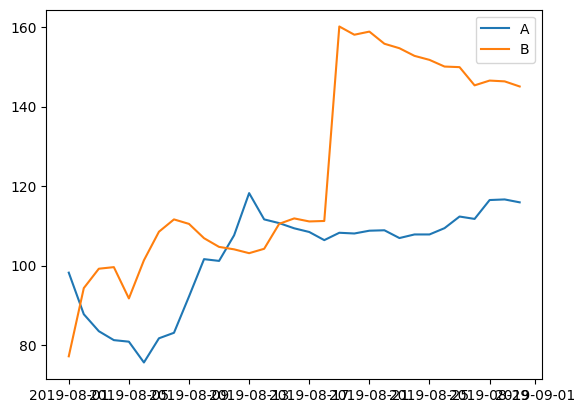

In [22]:
plt.plot(cum_rev_a['date'], cum_rev_a['revenue'] / cum_rev_a['orders'], label='A')
plt.plot(cum_rev_b['date'], cum_rev_b['revenue'] / cum_rev_b['orders'], label='B')
plt.legend()

El tamaño de la compra promedio se muestra variado en ambas pruebas, se observa que el grupo A va aumentando gradualmente con algunos picos y al final de la prueba se muestra más estable. Por otro lado en el grupo B aunque al principio va aumentando gradualmente tiene un pico alto poco después de la mitad del tiempo de la prueba.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo, la visualización deja ver la diferencia claramente
</div>

### 3.3 Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas.

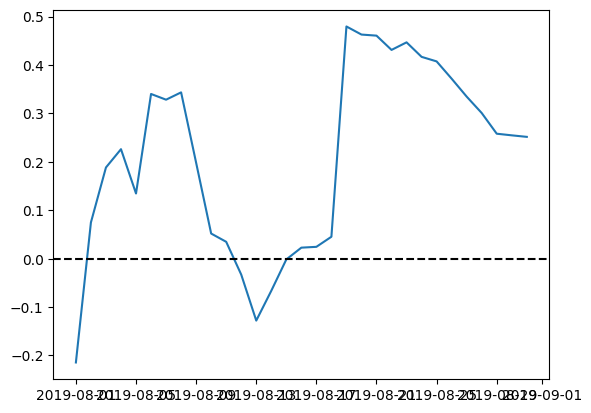

In [23]:
# Se hace un merge para reinuir los datos necesarios
merge_cum_rev = cum_rev_a.merge(cum_rev_b, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# Se crea una grafica de la diferencia relativa
plt.plot(merge_cum_rev['date'], (merge_cum_rev['revenueB']/merge_cum_rev['ordersB']) / (merge_cum_rev['revenueA']/merge_cum_rev['ordersA']) - 1)

# agregar el eje X
plt.axhline(y=0, color='black', linestyle='--')

En algunos puntos se puede observar como al principio de la prueba todo aumenta, a la mitad hay un pico bajo y en la segunda mitad de la prueba se puede observar un pico bastante alto, los cual indica que hay pedidos grandes y valores atípicos.

### 3.4 Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.

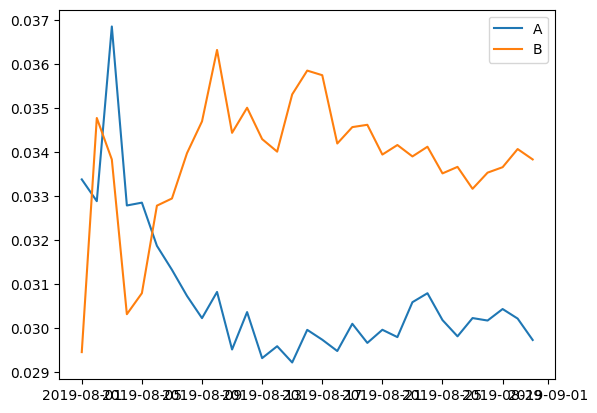

In [24]:
# Se crea una columna para calcular la conversion acumulada.
cum_data['conversion'] = cum_data['orders'] / cum_data['visitors']

# Se seleccionan datos del grupo A
cum_dataA = cum_data[cum_data['group'] == 'A']

# Se seleccionan datos del grupo B
cum_dataB = cum_data[cum_data['group'] == 'B']

# Se crean los gráficos
plt.plot(cum_dataA['date'], cum_dataA['conversion'], label='A')
plt.plot(cum_dataB['date'], cum_dataB['conversion'], label='B')
plt.legend()

En este gráfico se puede observar que los datos no son simétricos, solo hubo fluctuaciones alrededor del mismo valor al principio, este caso se puede observar que la tasa del grupo B fue la que aumentó antes de estabilizarse y por otra lado la del grupo B disminuyó.

### 3.5 Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.

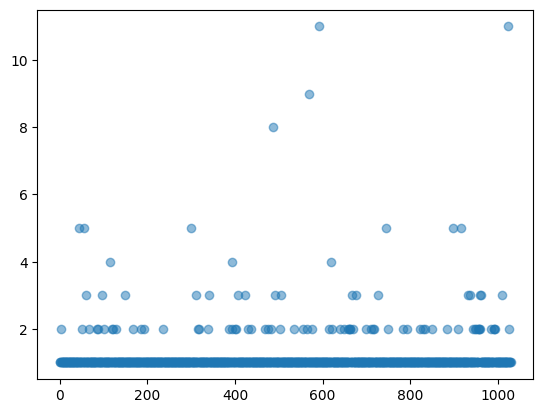

In [25]:
# Se agrupan los datos para obtener el numero de pedidos por usuario, obteniendo los pedidos unicos
orders_users = (
    orders_us.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)

# Se extraen solos las columans que se van a usar
orders_users.columns = ['userId', 'orders']

# Se obtienen los valores de x que son el rango de números desde 0 hasta el número de observaciones en orders_users
x_values = pd.Series(range(0,len(orders_users)))

# Se traza el grafico de dispersion
plt.scatter(x_values, orders_users['orders'], alpha=0.5)

En este grafico se puede observar que la mayoria de los usuarios han hecho uno o dos pedidos, tambien se observan algunos valores atipocos donde se han realizado mas de 10 pedidos.  

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Excelente trabajo con las visualizaciones y conclusiones desde las mismas, se pueden ver de manera correcta las diferencias entre grupos
</div>

### 3.6 Calcula los percentiles 95 y 99 para el número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [26]:
# Calculo de los percentiles para el numero de pedidos por usuario 
print(np.percentile (orders_users['orders'], [90, 95, 99]))

[1. 2. 4.]


Estos calculos dicen que no mas del 5% de los usuarios realizaron mas de 2 pedidos y no mas de 1% realizo 4 pedidos.

### 3.7 Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.

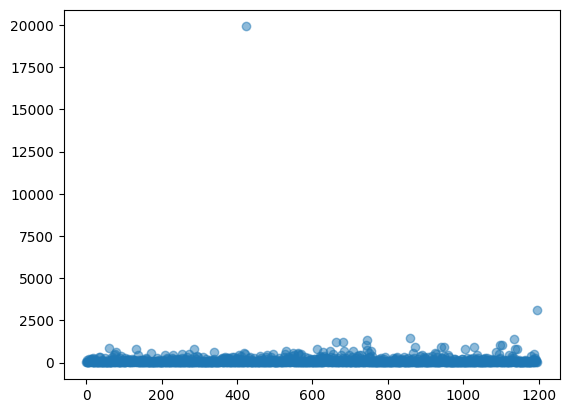

In [27]:
# Se obtienen los valores de x que son el rango de números desde 0 hasta el número de observaciones en orders_users
x_values = pd.Series(range(0, len(orders_us['revenue'])))

# Se traza el grafico de dispersion
plt.scatter(x_values, orders_us['revenue'], alpha=0.5)

En este grafico se puede observar que existen un par de pedidos grandes. El limite se puede establecer entre 2500 y 5000. Los valores mas extremos se pueden eliminar.

### 3.8 Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [28]:
# Calculo de los percentiles para los precios de los pedidos 
print(np.percentile (orders_us['revenue'], [90, 95, 99]))

[282.47999268 435.54000244 900.90401123]


Estos calulos dicen que no mas del 5% de los pedidos cuestan 435.54 y no mas del 1% cuestan  900.90

<div class="alert alert-block alert-success">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo revisando los percentiles, encontrar valores anómalos puede ser crucial al momento de mostrar métricas correctas ya que estos pueden afectar los resultados finales
</div>

### 3.9 Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

In [29]:
# Se agrupan los datos para almacenaer las columnas visitor_id y transaction_id de grupo A
ordersByUsersA = orders_us[orders_us['group'] == 'A'].groupby(
    'visitor_id', as_index=False).agg({'transaction_id': pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

# Se agrupan los datos para almacenaer las columnas visitor_id y transaction_id de grupo B
ordersByUsersB = orders_us[orders_us['group'] == 'B'].groupby(
    'visitor_id', as_index=False).agg({'transaction_id': pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

# Se crean las muestras con el numero de usuarios por grupo y el numero de pedidos de cada uno
sampleA = pd.concat([ordersByUsersA['orders'], pd.Series(0, index=np.arange(
    visits_us[visits_us['group'] == 'A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')], axis=0)

sampleB = pd.concat([ordersByUsersB['orders'], pd.Series(0, index=np.arange(
    visits_us[visits_us['group'] == 'B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')], axis=0)

# Se imprime la tasa de conversion de grupo A
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

# Se imprime la tasa de conversion de grupo B
print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.017
0.138


El primer valor da 0.017 que es menor que 0.05. Esto significa que podemos rechazar la hipotesis nula. Por otro lado en el grupo B tenemos 13.8% que seria una ganancia relativa de los datos en bruto. La conclusion de los datos en bruto que se pueden sacar es que no hay diferencia entre los grupos A y B.

### 3.10 Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

In [30]:
# Se calcula importancia estadística de la diferencia en el tamaño medio de los pedidos de los segmentos con mannwhitneyu
print('{0:.3f}'.format(stats.mannwhitneyu(
    orders_us[orders_us['group'] == 'A']['revenue'], orders_us[orders_us['group'] == 'B']['revenue'])[1]))

# Se calclula la direncia relativa del tamaño del promedio
print('{0:.3f}'.format(orders_us[orders_us['group'] == 'B']['revenue'].mean(
)/orders_us[orders_us['group'] == 'A']['revenue'].mean()-1))

0.692
0.252


Se puede obervar que el valor p es superior a 0.05 por lo que no se puede rechazar la hipotesis nula, el tamaño promedio entre los grupos difiere. En el segundo valor obtenido se observa que el tamaño promedio para el grupo B es mas pequeño.

<div class="alert alert-block alert-warning">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo aplicando las pruebas de hipótesis con los datos sin filtrar, veamos como resulta la misma prueba con los datos filtrados. Te recomiendo que aproveches más los strings formateados agregando texto que describa el valor que vas a mostrar, así es más fácil entender lo que quieres comunicar con esos números
</div>

### 3.11 Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

In [31]:
# Primero hay que revisar los usuarios anomalos, es decir los hiceron varios pedidos y los que hicieron pedidos costosos

# Se crea un slice con los usuarios que hicieron mas de 5 ordenes, esto se define en base al grafico de disperion del punto 3.5
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 5]
                                ['userId'], ordersByUsersB[ordersByUsersB['orders'] > 5]['userId']], axis=0)

# Se crea un slice con los usuarios que hicieron pedidos mayores a 2500, esto se define en base al grafico de dispesion del punto 3.7
usersWithExpensiveOrders = orders_us[orders_us['revenue'] > 2500]['visitor_id']

# Se unen los datos con un conact, se borran los duplicados y se ordenan los datos
abnormalUsers = pd.concat(
    [usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values()

# Se crea el filtrado de los datos del grupo A
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'], pd.Series(
    0, index=np.arange(visits_us[visits_us['group'] == 'A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')], axis=0)

# Se crea el filtrado de los datos del grupo B
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'], pd.Series(
    0, index=np.arange(visits_us[visits_us['group'] == 'B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')], axis=0)

# Imprimen las muestras resultantes aplicando el metodo Mann-Whitney
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.019
0.141


Estos resultados obtenidos ya con los datos filtrados no revelan estadisticas significativas, ya que son muy similares los resultados entre el grupo A y B.

### 3.12 Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

In [32]:
print('{0:.3f}'.format(stats.mannwhitneyu(
    orders_us[np.logical_and(
        orders_us['group']=='A',
        np.logical_not(orders_us['visitor_id'].isin(abnormalUsers)))]['revenue'],
    orders_us[np.logical_and(
        orders_us['group']=='B',
        np.logical_not(orders_us['visitor_id'].isin(abnormalUsers)))]['revenue'])[1]))

print('{0:.3f}'.format(
    orders_us[np.logical_and(orders_us['group']=='B',np.logical_not(orders_us['visitor_id'].isin(abnormalUsers)))]['revenue'].mean()/
    orders_us[np.logical_and(
        orders_us['group']=='A',
        np.logical_not(orders_us['visitor_id'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.849
-0.076


El valor p aumentó pero ahora la diferencia entre los segmentos es del 7%

### 3.13 Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son: 1. Para la prueba, considera a uno de los grupos como líder. 2. Para la prueba, concluye que no hay diferencia entre los grupos. 3. Continúa la prueba.

Basado en los resultados obtenidos de las pruebas de tanto de los datos en bruto como de los datos filtados podemos concluir que lo ideal es la opcion 2. Parar la prueba y concluir que no hay diferencia entre los grupos A y B, por lo que no tiene caso continuar. 

<div class="alert alert-block alert-success">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien aplicada la prueba de hipótesis con los datos filtrados!
</div>

# Conclusión

Las pruebas A/B son una herramienta valiosa para los negocios, ya que permiten evaluar de manera precisa si los cambios implementados están atrayendo más clientes. Estas pruebas facilitan la mejora continua de la experiencia del usuario, impulsan la conversión y mejoran las tasas de retención. Sin embargo, es crucial analizar los resultados obtenidos para determinar la efectividad de las modificaciones realizadas.

En este trabajo, se llevaron a cabo pruebas A/B para evaluar el impacto de ciertos cambios en el comportamiento de los usuarios. Los resultados mostraron que ni los datos en bruto ni los datos filtrados presentaron diferencias significativas. Específicamente, los datos sin procesar no revelaron una diferencia estadísticamente significativa entre los grupos en términos de tamaño promedio de compra.

Dado que no se observaron diferencias significativas, se concluye que no es conveniente continuar con la prueba. Continuar con ella representaría un gasto innecesario que no justifica los beneficios esperados. Por lo tanto, se recomienda detener la prueba y considerar otras estrategias o enfoques que puedan ser más efectivos para alcanzar los objetivos del negocio.

En resumen, aunque las pruebas A/B son una herramienta poderosa para la optimización de la experiencia del usuario y el aumento de la conversión, es fundamental evaluar los resultados de manera crítica. En este caso, la falta de diferencias significativas sugiere que los cambios implementados no tuvieron el impacto deseado, y por lo tanto, no se justifica seguir invirtiendo recursos en esta prueba específica.




<div class="alert alert-block alert-success">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Hiciste un buen trabajo con las visualizaciones, los cálculos y  los ejercicios propuestos los has resuelto muy bien planteando conclusiones claras sobre los resultados obtenidos en cada paso.
    
Planteaste muy buenas conclusiones en base a tus datos que es un punto importante que deben tener tus proyectos, como Data Analyst debes buscar apoyar en la toma de decisiones basadas en datos.
    
Saludos!
</div>